<a href="https://colab.research.google.com/github/CommanderWedgeAntilles/RealEstate/blob/main/senior_forever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
df = pd.read_csv('kingcounty.csv')

In [ ]:
X = df[['bedrooms','bathrooms','sqft_living','floors']]#,'zipcode'needs to be broken up into boolean categories
Y = df[['price']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
model = Sequential()

In [ ]:
model.add(keras.layers.Dense(20, activation='relu', input_shape=(4,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_270 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_271 (Dense)            (None, 32)                672       
_________________________________________________________________
dense_272 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_273 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_274 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_275 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_276 (Dense)            (None, 16)              

In [ ]:
model.compile(optimizer='adam', loss=[tf.keras.losses.MeanSquaredLogarithmicError()], metrics=['msle'])

In [ ]:
X_train.info


<bound method DataFrame.info of        bedrooms  bathrooms  sqft_living  floors
11194         3       2.75         2090     1.0
21049         4       3.50         3906     2.0
21146         5       2.75         2880     2.0
5851          4       3.00         3810     2.0
14442         4       2.50         3220     2.0
...         ...        ...          ...     ...
16738         3       1.00         1200     1.0
17186         3       2.50         1680     2.0
5924          3       2.00         1800     2.0
239           6       2.50         4410     1.0
13755         3       2.25         2340     1.0

[17290 rows x 4 columns]>

In [ ]:
model.fit(X_train, y_train, epochs=30, callbacks =[keras.callbacks.EarlyStopping(patience=5)], validation_data=(X_test, y_test), validation_batch_size=14515)#

Epoch 1/30
541/541 [==============================] - 2s 2ms/step - loss: 23.7263 - msle: 23.7263 - val_loss: 0.1572 - val_msle: 0.1572
Epoch 2/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1569 - msle: 0.1569 - val_loss: 0.1566 - val_msle: 0.1566
Epoch 3/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1535 - msle: 0.1535 - val_loss: 0.1561 - val_msle: 0.1561
Epoch 4/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1542 - msle: 0.1542 - val_loss: 0.1562 - val_msle: 0.1562
Epoch 5/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1551 - msle: 0.1551 - val_loss: 0.1562 - val_msle: 0.1562
Epoch 6/30
541/541 [==============================] - 1s 1ms/step - loss: 0.1566 - msle: 0.1566 - val_loss: 0.1569 - val_msle: 0.1569
Epoch 7/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1531 - msle: 0.1531 - val_loss: 0.1561 - val_msle: 0.1561
Epoch 8/30
541/541 [==============================] - 1s 2ms

In [ ]:
y_test

,price
11488,1325000.0
14764,530000.0
5678,575000.0
4523,1236000.0
13941,269950.0
...,...
16333,869000.0
11466,405000.0
4268,2400000.0
1737,189950.0


In [ ]:
model.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_270 (Dense)            (None, 20)                100       
_________________________________________________________________
dense_271 (Dense)            (None, 32)                672       
_________________________________________________________________
dense_272 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_273 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_274 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_275 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_276 (Dense)            (None, 16)              

In [ ]:
test_data = np.array([3,	1.75,	1980,	2.0])

print(model.predict(test_data.reshape(1,4), batch_size=1))

[[464981.03]]


Epoch 1/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1557 - msle: 0.1557 - val_loss: 0.1550 - val_msle: 0.1550
Epoch 2/30
541/541 [==============================] - 1s 1ms/step - loss: 0.1562 - msle: 0.1562 - val_loss: 0.1572 - val_msle: 0.1572
Epoch 3/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1559 - msle: 0.1559 - val_loss: 0.1627 - val_msle: 0.1627
Epoch 4/30
541/541 [==============================] - 1s 1ms/step - loss: 0.1558 - msle: 0.1558 - val_loss: 0.1549 - val_msle: 0.1549
Epoch 5/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1552 - msle: 0.1552 - val_loss: 0.1545 - val_msle: 0.1545
Epoch 6/30
541/541 [==============================] - 1s 2ms/step - loss: 0.1554 - msle: 0.1554 - val_loss: 0.1594 - val_msle: 0.1594
Epoch 7/30
541/541 [==============================] - 1s 1ms/step - loss: 0.1556 - msle: 0.1556 - val_loss: 0.1581 - val_msle: 0.1581
Epoch 8/30
541/541 [==============================] - 1s 2ms/s

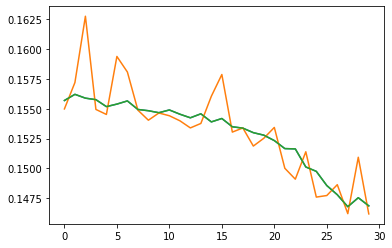

In [ ]:
history = model.fit(X_train, y_train, epochs=30, callbacks =[keras.callbacks.EarlyStopping(patience=5)], validation_data=(X_test, y_test), validation_batch_size=14515)
# plot metrics
plt.plot(history.history['msle'])
plt.plot(history.history['val_msle'])
plt.plot(history.history['loss'])
plt.show()

In [ ]:
#model.save('closeone2345')

In [ ]:
test_data = np.array([5,    2.50,   2910,   1.0])
 
print(model.predict(test_data.reshape(1,4), batch_size=1))

[[657288.44]]


In [ ]:
df.isnull()

NameError: ignored